In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp

In [2]:
data= pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## perform initial EDA 

In [3]:
##check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
##check for duplicated values
data[data.duplicated()]

,Delivery Time,Sorting Time


<AxesSubplot:>

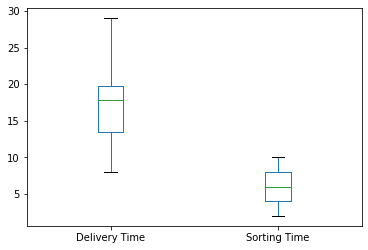

In [5]:
##check for outilers
import matplotlib.pyplot as plt
data.plot(kind='box')

In [7]:
#data['Delivery Time'].plot(kind="hist")

C:\Users\Anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

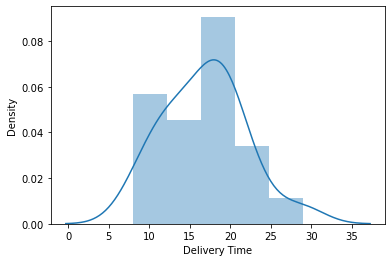

In [6]:
import seaborn as sns
import numpy as np
sns.distplot(data['Delivery Time'])

C:\Users\Anusha\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

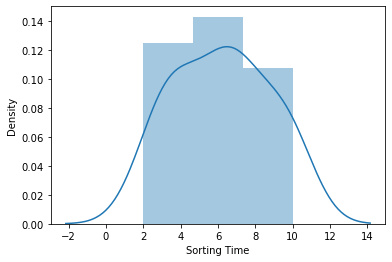

In [7]:
import seaborn as sns
import numpy as np
sns.distplot(data['Sorting Time'])

In [9]:
## Generate EDA profile Report
EDA_Report = pp.ProfileReport(data)
EDA_Report.to_file(output_file='datacleanreport_deliveryTime.html')

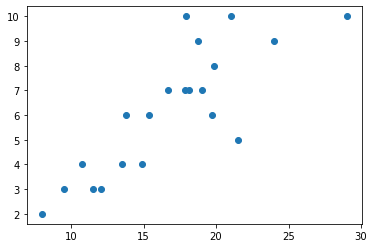

In [10]:
# for linear regression check for liniarity b/w delivary time and sorting time
plt.scatter('Delivery Time','Sorting Time',data =data)

In [11]:
# to find the strength of the relationship
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


###### as the value is high very, we can happly perform linear regression

In [12]:
#Rename the variable names
data = data.rename({'Delivery Time': 'DeliveryTime'}, axis=1)
data = data.rename({'Sorting Time':'SortingTime'},axis=1)
data

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
#model building
import statsmodels.formula.api as smf
model = smf.ols('DeliveryTime~SortingTime',data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 07 May 2021   Prob (F-statistic):           3.98e-06
Time:                        17:46:37   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# as model is not strong build a new model using log transformation
import statsmodels.formula.api as smf
model_imp=smf.ols("DeliveryTime~np.log(SortingTime)",data =data).fit()
model_imp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 07 May 2021   Prob (F-statistic):           2.64e-06
Time:                        17:46:48   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
# as model is not strong build a new model using exponential transformation
import statsmodels.formula.api as smf
model_imp=smf.ols("np.log(DeliveryTime)~SortingTime",data =data).fit()
model_imp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Fri, 07 May 2021   Prob (F-statistic):           1.59e-06
Time:                          17:46:53   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
data['log_DeliveryTime'] = np.log(data['DeliveryTime'])
data

,DeliveryTime,SortingTime,log_DeliveryTime
0,21.00,10,3.044522
1,13.50,4,2.602690
2,19.75,6,2.983153
3,24.00,9,3.178054
4,29.00,10,3.367296
5,15.35,6,2.731115
6,19.00,7,2.944439
7,9.50,3,2.251292
8,17.90,10,2.884801
9,18.75,9,2.931194


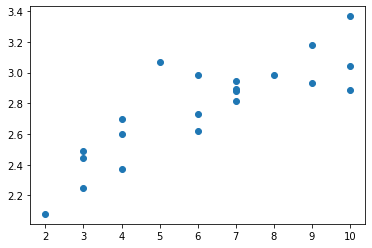

In [18]:
plt.scatter('SortingTime','log_DeliveryTime',data = data)

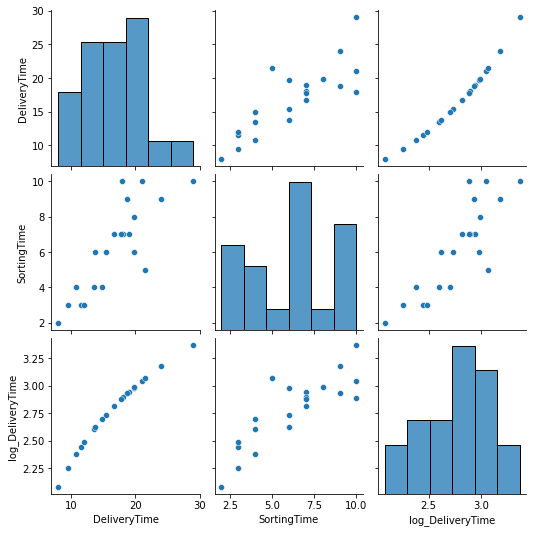

In [19]:
import seaborn as sns
sns.pairplot(data)

In [20]:
data.corr()

,DeliveryTime,SortingTime,log_DeliveryTime
DeliveryTime,1.000000,0.825997,0.981502
SortingTime,0.825997,1.000000,0.843177
log_DeliveryTime,0.981502,0.843177,1.000000


In [21]:
data['log_SortingTime']=np.log(data['SortingTime'])

In [22]:
# as model is not strong build a new model using exponential transformation
import statsmodels.formula.api as smf
model_imp=smf.ols("np.log(DeliveryTime)~np.log(SortingTime)",data =data).fit()
model_imp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.772
Model:                              OLS   Adj. R-squared:                  0.760
Method:                   Least Squares   F-statistic:                     64.39
Date:                  Fri, 07 May 2021   Prob (F-statistic):           1.60e-07
Time:                          17:47:24   Log-Likelihood:                 10.291
No. Observations:                    21   AIC:                            -16.58
Df Residuals:                        19   BIC:                            -14.49
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7420      0.133     13.086      0.000       1.463       2.021
np.log(SortingTime)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Predicting values of new data using exponential model

In [23]:
newdata=pd.Series([5,8,10])

In [24]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])
data_pred

,SortingTime
0,5
1,8
2,10


In [26]:
a =model.predict(data_pred)
a

0    14.827833
1    19.774893
2    23.072933
dtype: float64

In [27]:
b =model_imp.predict(data_pred)
actvalue = np.exp(b)
actvalue

0    14.934324
1    19.776608
2    22.597360
dtype: float64

### using cross validation creating training data and testing data sets


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
train_data,test_data = train_test_split(data,test_size=0.2)
train_data

,DeliveryTime,SortingTime,log_DeliveryTime,log_SortingTime
11,10.75,4,2.374906,1.386294
17,18.11,7,2.896464,1.945910
18,8.00,2,2.079442,0.693147
12,16.68,7,2.814210,1.945910
10,19.83,8,2.987196,2.079442
1,13.50,4,2.602690,1.386294
14,12.03,3,2.487404,1.098612
13,11.50,3,2.442347,1.098612
3,24.00,9,3.178054,2.197225
4,29.00,10,3.367296,2.302585


In [29]:
test_data

,DeliveryTime,SortingTime,log_DeliveryTime,log_SortingTime
8,17.90,10,2.884801,2.302585
16,13.75,6,2.621039,1.791759
0,21.00,10,3.044522,2.302585
9,18.75,9,2.931194,2.197225
6,19.00,7,2.944439,1.945910


In [30]:
# final exponential model building using train_data
import statsmodels.formula.api as smf
model_final=smf.ols("np.log(DeliveryTime)~SortingTime",data =train_data).fit()
model_final.summary()

C:\Users\Anusha\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.811
Model:                              OLS   Adj. R-squared:                  0.797
Method:                   Least Squares   F-statistic:                     59.95
Date:                  Fri, 07 May 2021   Prob (F-statistic):           2.00e-06
Time:                          17:47:57   Log-Likelihood:                 7.8952
No. Observations:                    16   AIC:                            -11.79
Df Residuals:                        14   BIC:                            -10.25
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0065      0.103     19.543      0.000       1.786       2.227
SortingTime     0.1334      0.017      7.743      0.000       0.096       0.170
==============================================================================
Omnibus:                        5.948   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.226
Skew:                           1.024   Prob(JB):                        0.199
Kurtosis:                       3.805   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
#predicting values for test data
b =model_final.predict(test_data)
predvalue = np.exp(b)
predvalue

8     28.238268
16    16.560051
0     28.238268
9     24.711207
6     18.923687
dtype: float64

In [32]:
## to caluclate RMSE Values
def RMSE(pred,actual):
    return np.sqrt(np.mean((actual-pred)**2))

In [33]:
# predict y values for train data
train_yhat = np.exp(model_final.predict(train_data))
train_y= train_data.DeliveryTime
RMSE_train= RMSE(train_yhat,train_y)
print("RMSE value of train data is",round(RMSE_train,4))


RMSE value of train data is 2.3412


In [34]:
# predict y values for test data
test_yhat = np.exp(model_final.predict(test_data))
test_y= test_data.DeliveryTime
RMSE_test= RMSE(test_yhat,test_y)
print("RMSE value of test data is",round(RMSE_test,4))


RMSE value of test data is 6.3673


## As the RMSE values of for this final models are similar and very less we can consider this as a best model